# Predicting Customer Churn in Telecom

## Importing all required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from xgboost import XGBClassifier
import joblib

## Load Dataset

In [2]:
df=pd.read_csv(r"C:\Users\hp\Downloads\Internship Task\Task-4\WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
print("Dataset shape:", df.shape)

Dataset shape: (7043, 21)


In [5]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [7]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [8]:
df.duplicated().sum()

0

In [9]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [10]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

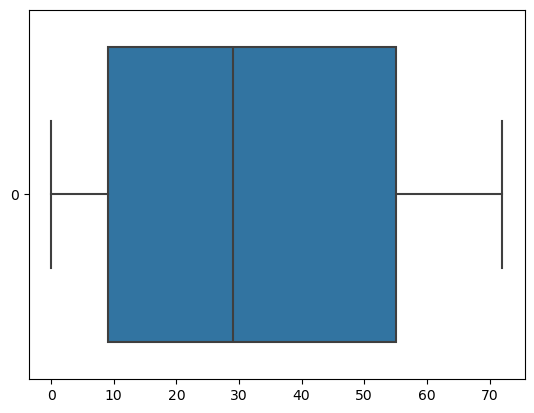

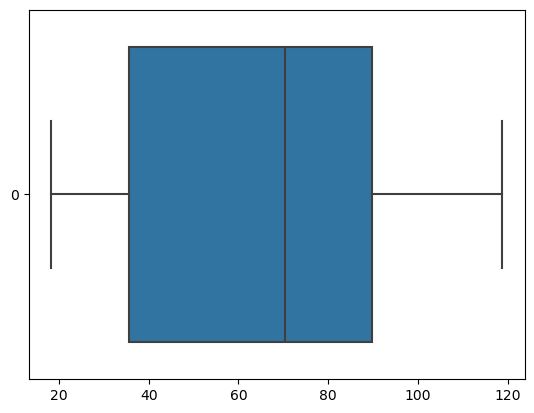

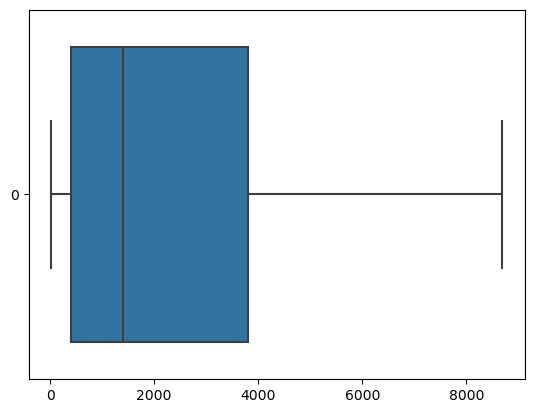

In [11]:
num_col= ['tenure','MonthlyCharges','TotalCharges']
for col in num_col:
    sns.boxplot(df[col], orient='h')
    plt.show()

## Exploratory Data Analysis (EDA)

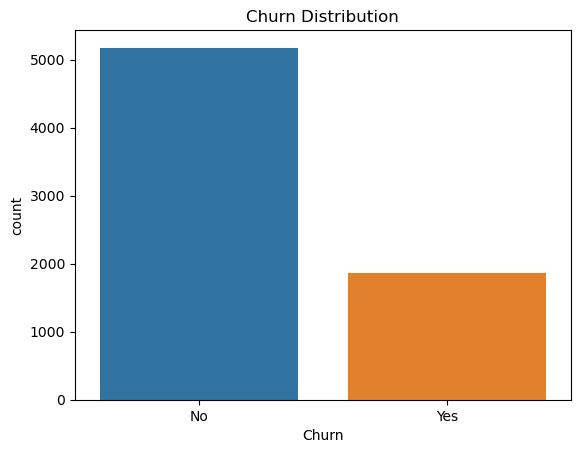

In [12]:
sns.countplot(x='Churn', data=df)
plt.title("Churn Distribution")
plt.show()


### Monthly Charges by Churn:

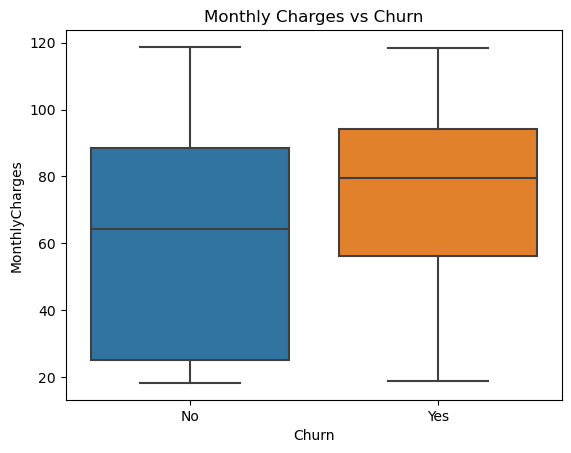

In [13]:
sns.boxplot(x='Churn', y='MonthlyCharges', data=df)
plt.title("Monthly Charges vs Churn")
plt.show()


### Contract Type vs Churn:

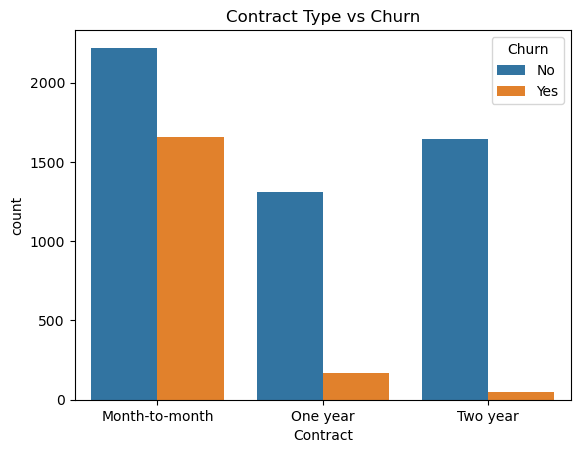

In [14]:
sns.countplot(x='Contract', hue='Churn', data=df)
plt.title("Contract Type vs Churn")
plt.show()


## Payment method vs churn:

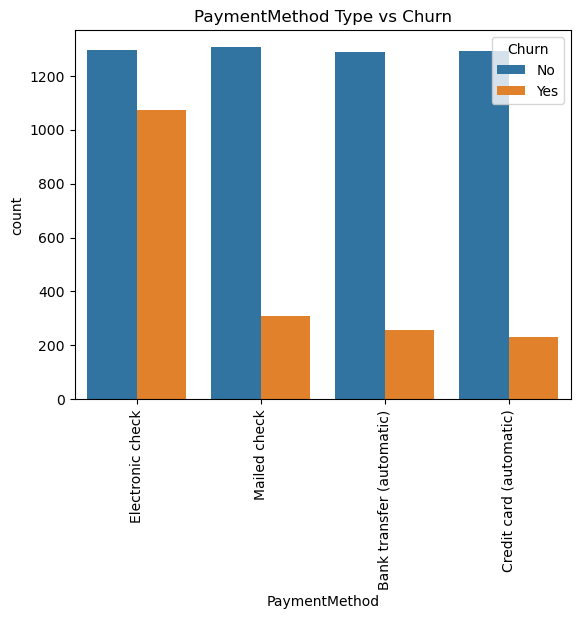

In [15]:
sns.countplot(x='PaymentMethod', hue='Churn', data=df)
plt.title("PaymentMethod Type vs Churn")
plt.xticks(rotation=90)
plt.show()

## Tenure vs churn:

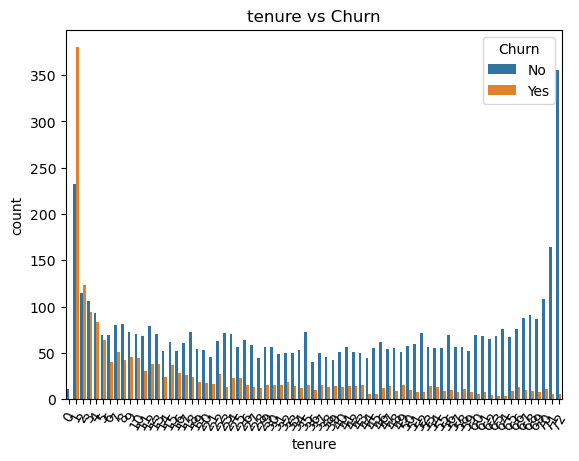

In [16]:
sns.countplot(x='tenure', hue='Churn', data=df)
plt.title("tenure vs Churn")
plt.xticks(rotation=60)
plt.show()

## Drop Irrelevant Columns:

In [17]:
df.drop('customerID', axis=1, inplace=True)

## Encode Categorical Variables

### Identify categorical columns:

In [18]:
cat_cols=df.select_dtypes(include='object').columns
cat_cols

Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'Churn'],
      dtype='object')

In [19]:
df.head(2)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No


### Label Encode for Binary Columns (Yes/No):

In [20]:
le = LabelEncoder()
binary_cols = ['gender','Churn', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling']
for col in binary_cols:
    df[col] = le.fit_transform(df[col])  # Yes=1, No=0


### One-Hot Encode for Multi-Class Columns:

In [21]:
en_data= df[['InternetService', 'Contract', 'PaymentMethod', 'MultipleLines',
                    'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                    'TechSupport', 'StreamingTV', 'StreamingMovies']]


In [22]:
encoder = OneHotEncoder(drop='first', sparse_output=False)  # drop='first' avoids dummy variable trap
encoded_array = encoder.fit_transform(en_data)

# Create DataFrame with encoded column names
encoded_df = pd.DataFrame(encoded_array, columns=encoder.get_feature_names_out(en_data.columns))

# -------------------------------
# Combine encoded features with the rest of the dataset
# -------------------------------
df_final = pd.concat([df.drop(en_data.columns, axis=1).reset_index(drop=True), 
                      encoded_df.reset_index(drop=True)], axis=1)

## Feature Scaling:

In [23]:
scaler = StandardScaler()
scale_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
df_final[scale_cols] = scaler.fit_transform(df_final[scale_cols])


In [24]:
df_final.isnull().sum()

gender                                    0
SeniorCitizen                             0
Partner                                   0
Dependents                                0
tenure                                    0
PhoneService                              0
PaperlessBilling                          0
MonthlyCharges                            0
TotalCharges                             11
Churn                                     0
InternetService_Fiber optic               0
InternetService_No                        0
Contract_One year                         0
Contract_Two year                         0
PaymentMethod_Credit card (automatic)     0
PaymentMethod_Electronic check            0
PaymentMethod_Mailed check                0
MultipleLines_No phone service            0
MultipleLines_Yes                         0
OnlineSecurity_No internet service        0
OnlineSecurity_Yes                        0
OnlineBackup_No internet service          0
OnlineBackup_Yes                

In [25]:
df_final.dropna(inplace=True)

In [26]:
df_final.isnull().sum()

gender                                   0
SeniorCitizen                            0
Partner                                  0
Dependents                               0
tenure                                   0
PhoneService                             0
PaperlessBilling                         0
MonthlyCharges                           0
TotalCharges                             0
Churn                                    0
InternetService_Fiber optic              0
InternetService_No                       0
Contract_One year                        0
Contract_Two year                        0
PaymentMethod_Credit card (automatic)    0
PaymentMethod_Electronic check           0
PaymentMethod_Mailed check               0
MultipleLines_No phone service           0
MultipleLines_Yes                        0
OnlineSecurity_No internet service       0
OnlineSecurity_Yes                       0
OnlineBackup_No internet service         0
OnlineBackup_Yes                         0
DeviceProte

## Train-Test Split:

In [27]:
X = df_final.drop('Churn', axis=1)
y = df_final['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


## Handling class imbalance

In [28]:
# Apply SMOTE to the training set
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)


In [29]:
# Check the class distribution after SMOTE
print("Before SMOTE:", y_train.value_counts())
print("After SMOTE:", y_train_res.value_counts())

Before SMOTE: Churn
0    4130
1    1495
Name: count, dtype: int64
After SMOTE: Churn
0    4130
1    4130
Name: count, dtype: int64


## Train Machine Learning Models

### Logistic Regression (Baseline Model)

In [30]:
log_model = LogisticRegression()
log_model.fit(X_train_res, y_train_res)

# Predictions
y_pred_log = log_model.predict(X_test)


### Random Forest (for Feature Importance)

In [31]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_res, y_train_res)

y_pred_rf = rf_model.predict(X_test)


## Model Evaluation

In [32]:
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_log))
print(confusion_matrix(y_test, y_pred_log))
print(classification_report(y_test, y_pred_log))

print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print(confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))


Logistic Regression Accuracy: 0.7263681592039801
[[740 293]
 [ 92 282]]
              precision    recall  f1-score   support

           0       0.89      0.72      0.79      1033
           1       0.49      0.75      0.59       374

    accuracy                           0.73      1407
   macro avg       0.69      0.74      0.69      1407
weighted avg       0.78      0.73      0.74      1407

Random Forest Accuracy: 0.7711442786069652
[[858 175]
 [147 227]]
              precision    recall  f1-score   support

           0       0.85      0.83      0.84      1033
           1       0.56      0.61      0.59       374

    accuracy                           0.77      1407
   macro avg       0.71      0.72      0.71      1407
weighted avg       0.78      0.77      0.77      1407



## Hyperparameter tuning using GridSearchCV

In [33]:
from sklearn.model_selection import GridSearchCV
rf = RandomForestClassifier(random_state=42, class_weight='balanced')

# Hyperparameter tuning using GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=5,
    scoring='f1',  # Optimize F1-score for class 1
    n_jobs=-1
)

grid_search.fit(X_train, y_train)

# Best model
best_rf = grid_search.best_estimator_
print("Best Parameters:", grid_search.best_params_)

# Evaluate model
y_pred = best_rf.predict(X_test)


Best Parameters: {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 300}


## Model Evaluation after Hyper Parameter Tunning on Random Forest Model:

In [34]:
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Random Forest Accuracy: 0.7633262260127932
Confusion Matrix:
 [[790 243]
 [ 90 284]]

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.76      0.83      1033
           1       0.54      0.76      0.63       374

    accuracy                           0.76      1407
   macro avg       0.72      0.76      0.73      1407
weighted avg       0.80      0.76      0.77      1407



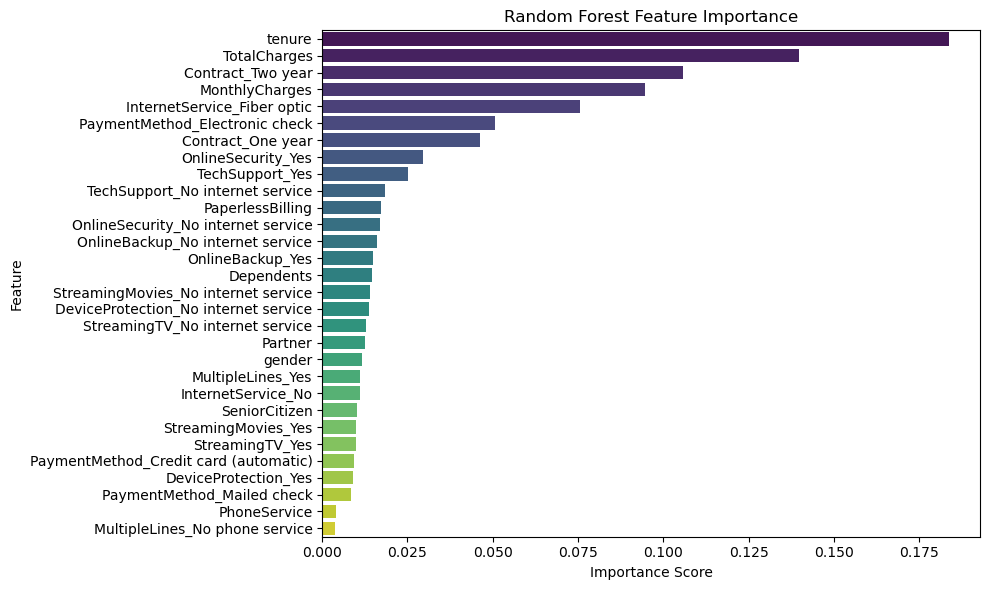

In [35]:
# Get feature importances
importances = best_rf.feature_importances_

# Create a DataFrame
feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(10,6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')
plt.title('Random Forest Feature Importance')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

In [36]:
joblib.dump(best_rf, 'random_forest_model.pkl')

['random_forest_model.pkl']

## Insights:

### ✅ High Monthly Charges → Higher Churn:
#### Customers with higher monthly charges are more likely to churn. Price-sensitive customers may feel they are not receiving enough value for the cost.

### ✅ Contract Type Strongly Influences Churn:
#### Month-to-month customers show the highest churn rate, while customers with one-year and two-year contracts churn significantly less.

### ✅ Dependence on Services:
#### Customers using multiple services (Internet + Phone + TV) tend to stay longer compared to customers with fewer services. More bundled services improve retention.

### ✅ Tenure is a Key Predictor:
#### New customers are more likely to churn compared to long-tenured customers, suggesting that the first few months are critical in building loyalty.

### ✅ Payment Method & Churn:
#### Customers using electronic checks have the highest churn rate compared to those using credit cards or bank transfers, indicating possible dissatisfaction or trust issues.



## Recommendations:

### ✅ Introduce Loyalty Programs:
#### Provide discounts, rewards, or premium offers for long-tenured customers and those who commit to longer contracts.

### ✅ Flexible Pricing & Bundling:
#### Offer customized pricing plans or bundled services at discounted rates to reduce churn among high monthly charge customers.

### ✅ Customer Onboarding & Engagement:
#### Improve onboarding for new customers (first 3–6 months) with personalized support, tutorials, and proactive communication to reduce early churn.

### ✅ Incentivize Long-Term Contracts:
#### Provide promotions (e.g., reduced activation fee, first-month free) for customers switching from month-to-month to annual contracts.

### ✅ Improve Payment Experience:
#### Encourage customers to move away from electronic checks by offering cashback or discounts on auto-pay with credit card/bank transfers.

### ✅ Proactive Retention Strategy:
#### Use churn prediction model outputs to identify high-risk customers in real time and trigger retention campaigns (personalized offers, customer service outreach, special discounts).